# Data Analysis

---

## Data Cleaning

First, we'll need to preprocess and clean the textual data. Textual data often contains noise in various forms like punctuation, special characters, numbers, and stop words that might not be useful for analysis.

### Tokenization

This is the process of breaking down the text into individual words (tokens).

In [1]:
import pandas as pd

# Load the dataset from the provided URL
link = 'https://raw.githubusercontent.com/sabirinID/British-Airways-Data-Science-Virtual-Internship/main/Files/1-Web%20scraping%20to%20gain%20company%20insights/data/BA_reviews.csv'
data = pd.read_csv(link, index_col=0)

# Print the first 10 reviews
print(data.head(10))

                                             reviews
0  ✅ Trip Verified |  4 Hours before takeoff we r...
1  ✅ Trip Verified |  I recently had a delay on B...
2  Not Verified |  Boarded on time, but it took a...
3  ✅ Trip Verified |  5 days before the flight, w...
4  Not Verified |  \nWe traveled to Lisbon for ou...
5  ✅ Trip Verified |  Booked a flight from Buchar...
6  ✅ Trip Verified |  Booked online months ago an...
7  ✅ Trip Verified |  The flight was on time. The...
8  Not Verified |  Angry, disappointed, and unsat...
9  ✅ Trip Verified |  As an infrequent flyer, Bri...


In [2]:
# Define a list of strings to replace in the 'reviews' column
strings_to_replace = [
   '✅ Trip Verified | ',
   'Not Verified | ',
   '\n',
   '\t'
   ]

# Loop through the list and replace each string with an empty string
for s in strings_to_replace:
   data['reviews'] = data['reviews'].str.replace(s, '', regex=False)

# Print the first 10 reviews after cleaning
print(data.head(10))

                                             reviews
0   4 Hours before takeoff we received a Mail sta...
1   I recently had a delay on British Airways fro...
2   Boarded on time, but it took ages to get to t...
3   5 days before the flight, we were advised by ...
4   We traveled to Lisbon for our dream vacation,...
5   Booked a flight from Bucharest to Manchester ...
6   Booked online months ago and the only hitch w...
7   The flight was on time. The crew were polite....
8   Angry, disappointed, and unsatisfied. My rout...
9   As an infrequent flyer, British Airways was a...


In [3]:
# pip install nltk

In [4]:
import nltk

# Download the 'punkt' resource for tokenizing text
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize each row of the 'reviews' column
tokens = data['reviews'].apply(word_tokenize)

# Print the first 10 reviews after tokenization
print(tokens.head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [4, Hours, before, takeoff, we, received, a, M...
1    [I, recently, had, a, delay, on, British, Airw...
2    [Boarded, on, time, ,, but, it, took, ages, to...
3    [5, days, before, the, flight, ,, we, were, ad...
4    [We, traveled, to, Lisbon, for, our, dream, va...
5    [Booked, a, flight, from, Bucharest, to, Manch...
6    [Booked, online, months, ago, and, the, only, ...
7    [The, flight, was, on, time, ., The, crew, wer...
8    [Angry, ,, disappointed, ,, and, unsatisfied, ...
9    [As, an, infrequent, flyer, ,, British, Airway...
Name: reviews, dtype: object


### Lowercasing

Convert all the text to lower case. This avoids having multiple copies of the same words.

In [5]:
# Convert each word to lowercase
tokens = [[word.lower() for word in review] for review in tokens]

# Print the first 10 reviews after lowercasing
print(tokens[:10])

[['4', 'hours', 'before', 'takeoff', 'we', 'received', 'a', 'mail', 'stating', 'a', 'cryptic', 'message', 'that', 'there', 'are', 'disruptions', 'to', 'be', 'expected', 'as', 'there', 'is', 'a', 'limit', 'on', 'how', 'many', 'planes', 'can', 'leave', 'at', 'the', 'same', 'time', '.', 'so', 'did', 'the', 'capacity', 'of', 'the', 'heathrow', 'airport', 'really', 'hit', 'british', 'airways', 'by', 'surprise', ',', '4h', 'before', 'departure', '?', 'anyhow', '-', 'we', 'took', 'the', 'one', 'hour', 'delay', 'so', 'what', '-', 'but', 'then', 'we', 'have', 'been', 'forced', 'to', 'check', 'in', 'our', 'hand', 'luggage', '.', 'i', 'travel', 'only', 'with', 'hand', 'luggage', 'to', 'avoid', 'waiting', 'for', 'the', 'ultra', 'slow', 'processing', 'of', 'the', 'checked', 'in', 'luggage', '.', 'overall', '2h', 'later', 'at', 'home', 'than', 'planed', ',', 'with', 'really', 'no', 'reason', ',', 'just', 'due', 'to', 'incompetent', 'people', '.', 'service', 'level', 'far', 'worse', 'then', 'ryanair'

### Removing Punctuation and Numbers

We can use Python's built-in `string.punctuation` to remove all punctuation.

In [6]:
import string

# Create a translation table that maps every punctuation character to None
table = str.maketrans('', '', string.punctuation)

# Use a nested list comprehension to remove punctuation from each word in each review
stripped = [[word.translate(table) for word in review] for review in tokens]

# Print the first 10 reviews after removing punctuation
print(stripped[:10])

[['4', 'hours', 'before', 'takeoff', 'we', 'received', 'a', 'mail', 'stating', 'a', 'cryptic', 'message', 'that', 'there', 'are', 'disruptions', 'to', 'be', 'expected', 'as', 'there', 'is', 'a', 'limit', 'on', 'how', 'many', 'planes', 'can', 'leave', 'at', 'the', 'same', 'time', '', 'so', 'did', 'the', 'capacity', 'of', 'the', 'heathrow', 'airport', 'really', 'hit', 'british', 'airways', 'by', 'surprise', '', '4h', 'before', 'departure', '', 'anyhow', '', 'we', 'took', 'the', 'one', 'hour', 'delay', 'so', 'what', '', 'but', 'then', 'we', 'have', 'been', 'forced', 'to', 'check', 'in', 'our', 'hand', 'luggage', '', 'i', 'travel', 'only', 'with', 'hand', 'luggage', 'to', 'avoid', 'waiting', 'for', 'the', 'ultra', 'slow', 'processing', 'of', 'the', 'checked', 'in', 'luggage', '', 'overall', '2h', 'later', 'at', 'home', 'than', 'planed', '', 'with', 'really', 'no', 'reason', '', 'just', 'due', 'to', 'incompetent', 'people', '', 'service', 'level', 'far', 'worse', 'then', 'ryanair', 'and', '

### Removing Stop Words

Stop words are common words like 'is', 'the', 'a', etc. that do not carry much meaningful information. NLTK has a list of commonly agreed upon stop words that we can use to filter out from our tokens.

In [7]:
# Download the 'stopwords' resource for removing stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define the set of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from each review
words = [[word for word in review if not word in stop_words] for review in stripped]

# Print the first 10 reviews after removing stop words
print(words[:10])

[['4', 'hours', 'takeoff', 'received', 'mail', 'stating', 'cryptic', 'message', 'disruptions', 'expected', 'limit', 'many', 'planes', 'leave', 'time', '', 'capacity', 'heathrow', 'airport', 'really', 'hit', 'british', 'airways', 'surprise', '', '4h', 'departure', '', 'anyhow', '', 'took', 'one', 'hour', 'delay', '', 'forced', 'check', 'hand', 'luggage', '', 'travel', 'hand', 'luggage', 'avoid', 'waiting', 'ultra', 'slow', 'processing', 'checked', 'luggage', '', 'overall', '2h', 'later', 'home', 'planed', '', 'really', 'reason', '', 'due', 'incompetent', 'people', '', 'service', 'level', 'far', 'worse', 'ryanair', 'triple', 'price', '', 'really', 'never', '', 'thanks', 'nothing', ''], ['recently', 'delay', 'british', 'airways', 'bru', 'lhr', 'due', 'staff', 'shortages', '', 'announced', '2', 'hour', 'holding', 'delay', 'would', 'board', 'us', 'immediately', 'hopes', 'clearing', 'gate', 'leaving', 'early', '', 'wait', 'full', '2', 'hours', 'inside', 'airplane', '', 'plane', 'old', '', 'd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming

This is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. For example, 'jumps', 'jumping', 'jumped' can be reduced to the stem 'jump'.

In [8]:
from nltk.stem.porter import PorterStemmer

# Initialize the PorterStemmer
porter = PorterStemmer()

# Use a nested list comprehension to stem each word in each review
stemmed = [[porter.stem(word) for word in review] for review in words]

# Print the first 10 reviews after stemming
print(stemmed[:10])

[['4', 'hour', 'takeoff', 'receiv', 'mail', 'state', 'cryptic', 'messag', 'disrupt', 'expect', 'limit', 'mani', 'plane', 'leav', 'time', '', 'capac', 'heathrow', 'airport', 'realli', 'hit', 'british', 'airway', 'surpris', '', '4h', 'departur', '', 'anyhow', '', 'took', 'one', 'hour', 'delay', '', 'forc', 'check', 'hand', 'luggag', '', 'travel', 'hand', 'luggag', 'avoid', 'wait', 'ultra', 'slow', 'process', 'check', 'luggag', '', 'overal', '2h', 'later', 'home', 'plane', '', 'realli', 'reason', '', 'due', 'incompet', 'peopl', '', 'servic', 'level', 'far', 'wors', 'ryanair', 'tripl', 'price', '', 'realli', 'never', '', 'thank', 'noth', ''], ['recent', 'delay', 'british', 'airway', 'bru', 'lhr', 'due', 'staff', 'shortag', '', 'announc', '2', 'hour', 'hold', 'delay', 'would', 'board', 'us', 'immedi', 'hope', 'clear', 'gate', 'leav', 'earli', '', 'wait', 'full', '2', 'hour', 'insid', 'airplan', '', 'plane', 'old', '', 'dirti', '', 'power', 'seat', '', 'staff', 'provid', 'small', 'bag', 'pre

Another approach is to use lemmatization instead of stemming. Lemmatization is a more sophisticated process that considers the context and part of speech of a word. It uses a vocabulary and morphological analysis of words to return the base or dictionary form of a word, which is known as the lemma.

In [9]:
# Download the 'wordnet' resource for lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Use a nested list comprehension to lemmatize each word in each review
lemmatized = [[lemmatizer.lemmatize(word) for word in review] for review in words]

# Remove zero characters from each review
lemmatized = [[word for word in review if word] for review in lemmatized]

# Print the first 10 reviews after lemmatization
print(lemmatized[:10])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['4', 'hour', 'takeoff', 'received', 'mail', 'stating', 'cryptic', 'message', 'disruption', 'expected', 'limit', 'many', 'plane', 'leave', 'time', 'capacity', 'heathrow', 'airport', 'really', 'hit', 'british', 'airway', 'surprise', '4h', 'departure', 'anyhow', 'took', 'one', 'hour', 'delay', 'forced', 'check', 'hand', 'luggage', 'travel', 'hand', 'luggage', 'avoid', 'waiting', 'ultra', 'slow', 'processing', 'checked', 'luggage', 'overall', '2h', 'later', 'home', 'planed', 'really', 'reason', 'due', 'incompetent', 'people', 'service', 'level', 'far', 'worse', 'ryanair', 'triple', 'price', 'really', 'never', 'thanks', 'nothing'], ['recently', 'delay', 'british', 'airway', 'bru', 'lhr', 'due', 'staff', 'shortage', 'announced', '2', 'hour', 'holding', 'delay', 'would', 'board', 'u', 'immediately', 'hope', 'clearing', 'gate', 'leaving', 'early', 'wait', 'full', '2', 'hour', 'inside', 'airplane', 'plane', 'old', 'dirty', 'power', 'seat', 'staff', 'provided', 'small', 'bag', 'pretzel', '250m

---

## Data Analysis

Once the data is clean, we can perform our own analysis to uncover insights. We could look at topic modelling, sentiment analysis, or wordclouds to provide some insight into the content of the reviews.

### Topic Modelling

This is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert lemmatized into a single list of strings
lemmatized = [' '.join(review) for review in lemmatized]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Convert the lemmatized list into a 2D array-like structure
X = vectorizer.fit_transform(lemmatized)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=100)
lda.fit(X)

LatentDirichletAllocation(random_state=100)

### Sentiment Analysis

This involves classifying opinions in text into categories like "positive" or "negative" often with an additional neutral category. TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [11]:
# pip install textblob

In [12]:
from textblob import TextBlob

# Perform sentiment analysis on each review
sentiments = [TextBlob(review).sentiment for review in lemmatized]

# Print the sentiments of the first 10 reviews
print(sentiments[:10])

[Sentiment(polarity=-0.04821428571428571, subjectivity=0.31726190476190474), Sentiment(polarity=0.006944444444444438, subjectivity=0.36712962962962964), Sentiment(polarity=0.1408333333333333, subjectivity=0.3775), Sentiment(polarity=0.1138888888888889, subjectivity=0.5782539682539682), Sentiment(polarity=0.13541666666666666, subjectivity=0.29444444444444445), Sentiment(polarity=-0.2348958333333333, subjectivity=0.5234375), Sentiment(polarity=0.10059523809523808, subjectivity=0.511904761904762), Sentiment(polarity=0.21999999999999997, subjectivity=0.54), Sentiment(polarity=0.08333333333333334, subjectivity=0.5444444444444444), Sentiment(polarity=0.04761904761904762, subjectivity=0.3503968253968254)]


In [13]:
# Separate polarity and subjectivity
polarities = [sentiment.polarity for sentiment in sentiments]
subjectivities = [sentiment.subjectivity for sentiment in sentiments]

In [14]:
polarities[:10]

[-0.04821428571428571,
 0.006944444444444438,
 0.1408333333333333,
 0.1138888888888889,
 0.13541666666666666,
 -0.2348958333333333,
 0.10059523809523808,
 0.21999999999999997,
 0.08333333333333334,
 0.04761904761904762]

In [15]:
subjectivities[:10]

[0.31726190476190474,
 0.36712962962962964,
 0.3775,
 0.5782539682539682,
 0.29444444444444445,
 0.5234375,
 0.511904761904762,
 0.54,
 0.5444444444444444,
 0.3503968253968254]

### Wordclouds

This is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [16]:
# pip install wordcloud

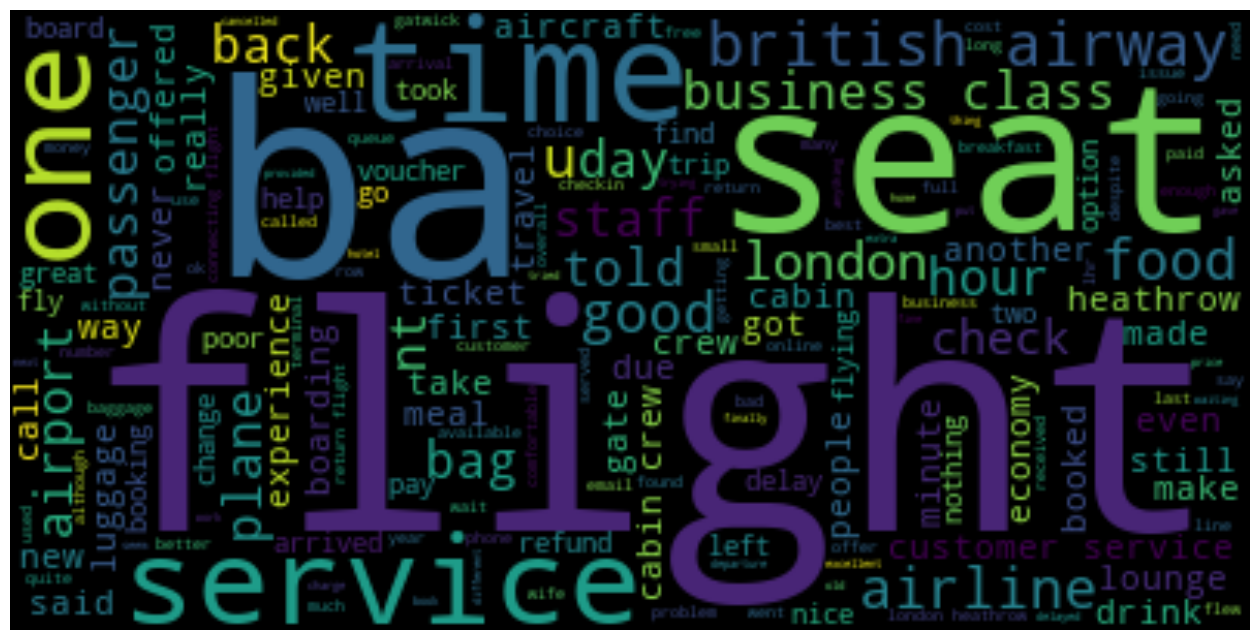

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one big string
big_string = ' '.join(lemmatized)

# Create a WordCloud object and generate it
wordcloud = WordCloud()

# Generate a word cloud
wordcloud.generate(big_string)

# wordcloud = WordCloud().generate(' '.join(lemmatized))

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

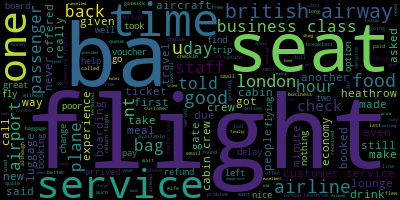

In [18]:
# Visualize the word cloud
wordcloud.to_image()

In [19]:
# Process the text
word_counts = wordcloud.process_text(big_string)

# Print the word counts
for word, count in word_counts.items():
    print(f'{word}: {count}')

hour: 273
takeoff: 19
received: 73
mail: 2
stating: 7
cryptic: 1
message: 24
disruption: 5
expected: 27
limit: 1
many: 82
plane: 239
leave: 36
time: 463
capacity: 5
heathrow: 200
airport: 230
really: 145
hit: 10
airway: 8
surprise: 10
4h: 4
departure: 73
anyhow: 1
took: 114
one: 407
delay: 108
forced: 18
check: 208
hand: 20
luggage: 145
travel: 132
avoid: 31
waiting: 67
ultra: 3
slow: 30
processing: 9
checked: 39
overall: 79
2h: 4
later: 40
home: 67
planed: 1
reason: 50
due: 135
incompetent: 8
people: 142
service: 416
level: 33
far: 41
worse: 30
ryanair: 20
triple: 2
price: 73
never: 138
nothing: 114
recently: 21
bru: 2
lhr: 94
staff: 252
shortage: 5
announced: 15
holding: 6
board: 120
u: 322
immediately: 19
hope: 24
clearing: 4
gate: 135
leaving: 35
early: 31
wait: 84
full: 92
inside: 10
airplane: 10
old: 66
dirty: 20
power: 7
seat: 550
provided: 65
small: 92
bag: 226
pretzel: 6
water: 60
passenger: 266
flight: 1366
option: 102
purchase: 21
food: 314
drink: 137
entertainment: 43
avail

In [20]:
# Convert the dictionary into a DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

# Sort the DataFrame by the 'count' column in descending order
word_counts_df_sorted = word_counts_df.sort_values(by='count', ascending=False)
word_counts_df_sorted

,count
flight,1366
ba,984
seat,550
time,463
service,416
...,...
beg,1
trash,1
empathysympathyunderstanding,1
listened,1


In [21]:
word_counts_df_sorted['count'].sum()

64763